### Decision Tree Methods - In class practice

In [ ]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

1. Import libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

2. Import the bank dataset

In [35]:
bank = pd.read_csv('Bank.csv')

In [36]:
bank.shape

(5000, 14)

In [37]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [38]:
bank.head(5000)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


3. The dependent variable is 'Personal Loan', meaning whether the customer accepts a personal loan offer or not. Take a look at its distribution.

In [39]:
bank['Personal Loan'].unique()

array([0, 1])

In [43]:
personal_loan_counts=bank['Personal Loan'].value_counts()
personal_loan_counts

0    4520
1     480
Name: Personal Loan, dtype: int64

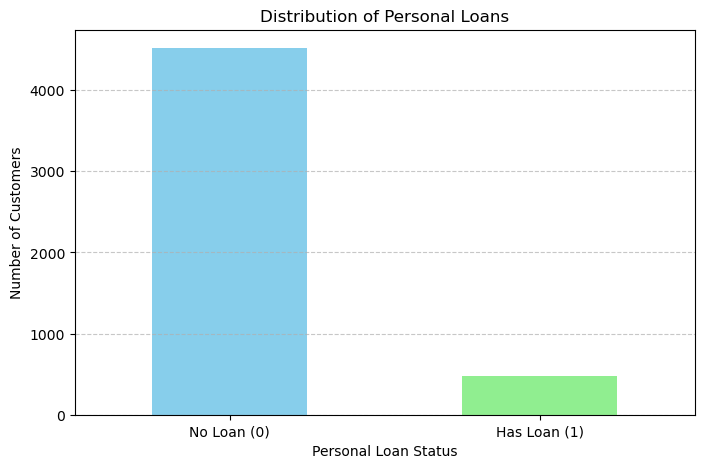

In [44]:
plt.figure(figsize=(8, 5))
personal_loan_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Personal Loans')
plt.xlabel('Personal Loan Status')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['No Loan (0)', 'Has Loan (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

4. Prepare X and y

In [45]:
X = bank.drop(['Personal Loan','ID', 'ZIP Code'], axis = 1)
y = bank['Personal Loan']

In [100]:
X.head(5000)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [102]:
y.head(5000)

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

5. Split training and test datasets

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


6. Fit a decision tree.<br>
We set the max depth to be 3 to stop the tree growing.

In [49]:
dt_1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dt_1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

7. Plot the tree and print the classification results.<br>
Calculate the accuracy rate and confusion matrix.

In [52]:
X.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [50]:
bank_names=X.columns

[Text(0.4230769230769231, 0.875, 'Income <= 98.5\nentropy = 0.471\nsamples = 3500\nvalue = [3148, 352]'),
 Text(0.15384615384615385, 0.625, 'CCAvg <= 2.95\nentropy = 0.07\nsamples = 2611\nvalue = [2589, 22]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 2462\nvalue = [2462, 0]'),
 Text(0.23076923076923078, 0.375, 'CD Account <= 0.5\nentropy = 0.604\nsamples = 149\nvalue = [127, 22]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.469\nsamples = 140\nvalue = [126, 14]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.503\nsamples = 9\nvalue = [1, 8]'),
 Text(0.6923076923076923, 0.625, 'Education <= 1.5\nentropy = 0.952\nsamples = 889\nvalue = [559, 330]'),
 Text(0.5384615384615384, 0.375, 'Family <= 2.5\nentropy = 0.495\nsamples = 526\nvalue = [469, 57]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.086\nsamples = 462\nvalue = [457, 5]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.696\nsamples = 64\nvalue = [12, 52]'),
 Text(0.8461538461538461, 0.375, 'Income <= 11

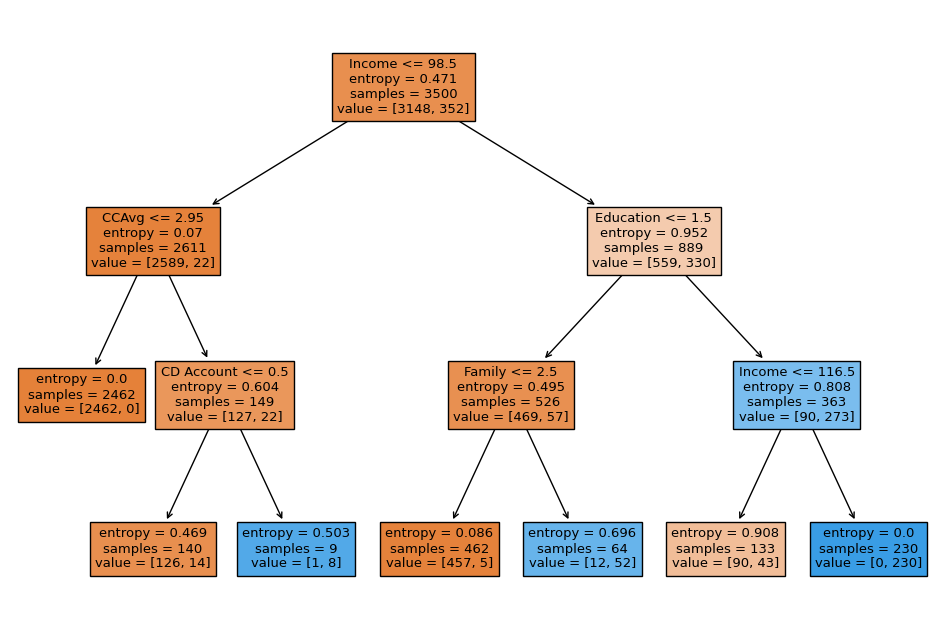

In [53]:
plt.figure(figsize=(12, 8))
plot_tree(dt_1, filled=True, feature_names = bank_names.tolist())
          #class_names = ['low', 'high'])

In [68]:
dt_1_pred = dt_1.predict(X_test)

In [70]:
accuracy_score(y_test, dt_1_pred)


0.9826666666666667

In [71]:

confusion_matrix(y_test, dt_1_pred)

array([[1362,   10],
       [  16,  112]])

In [72]:
pd.crosstab(y_test, dt_1_pred, rownames=['True'], colnames=['Predicted'])#, margins=True)

Predicted,0,1
True,,
0,1362,10
1,16,112


8. Next we fit a tree without specifying stopping criteria.<br>
By default, the tree will grown until there is no more information gain.<br>
Repeat Step 7 for this tree.

In [54]:
dt_full = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_full.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[Text(0.5160256410256411, 0.9736842105263158, 'Income <= 98.5\nentropy = 0.471\nsamples = 3500\nvalue = [3148, 352]'),
 Text(0.3333333333333333, 0.9210526315789473, 'CCAvg <= 2.95\nentropy = 0.07\nsamples = 2611\nvalue = [2589, 22]'),
 Text(0.3076923076923077, 0.868421052631579, 'entropy = 0.0\nsamples = 2462\nvalue = [2462, 0]'),
 Text(0.358974358974359, 0.868421052631579, 'CD Account <= 0.5\nentropy = 0.604\nsamples = 149\nvalue = [127, 22]'),
 Text(0.3076923076923077, 0.8157894736842105, 'CCAvg <= 4.2\nentropy = 0.469\nsamples = 140\nvalue = [126, 14]'),
 Text(0.28205128205128205, 0.7631578947368421, 'Income <= 63.5\nentropy = 0.547\nsamples = 111\nvalue = [97, 14]'),
 Text(0.2564102564102564, 0.7105263157894737, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.3076923076923077, 0.7105263157894737, 'CCAvg <= 4.05\nentropy = 0.624\nsamples = 90\nvalue = [76, 14]'),
 Text(0.28205128205128205, 0.6578947368421053, 'CCAvg <= 3.95\nentropy = 0.6\nsamples = 89\nvalue = [76, 13]'),


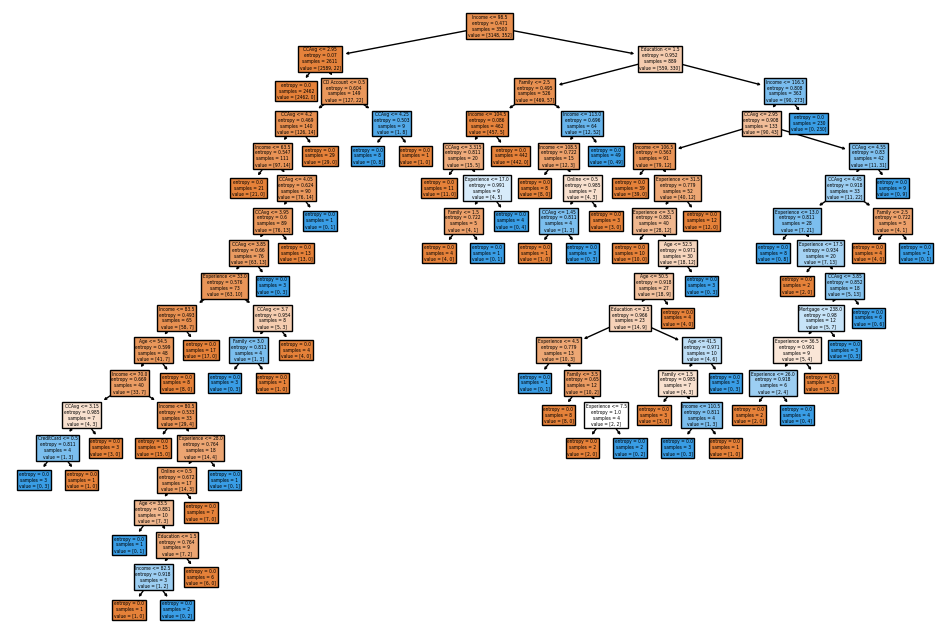

In [55]:
plt.figure(figsize=(12, 8))
plot_tree(dt_full, filled=True, feature_names = bank_names.tolist())
          #class_names = ['low', 'high'])

In [61]:
dt_full_pred = dt_full.predict(X_test)


In [66]:
accuracy_score(y_test, dt_full_pred)



0.9846666666666667

In [67]:
confusion_matrix(y_test, dt_full_pred)

array([[1364,    8],
       [  15,  113]])

9. Bagging, random forest and boosting. Repeat Step 7 for all methods.

9.1 Bagging

In [73]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [87]:
dt_bag = RandomForestClassifier(n_estimators=500, max_features=None, random_state=0)
# we are going to use all the features

In [88]:
dt_bag.fit(X_train, y_train)


RandomForestClassifier(max_features=None, n_estimators=500, random_state=0)

In [89]:
dt_bag_pred = dt_bag.predict(X_test)


In [90]:
accuracy_score(y_test, dt_bag_pred)

0.9846666666666667

In [91]:
confusion_matrix(y_test, dt_bag_pred)

array([[1365,    7],
       [  16,  112]])

9.2 Random forest

In [81]:
dt_rf = RandomForestClassifier(n_estimators=500, max_features = 4, random_state=0)
# max_features is set to sqrt(p), about 4.

In [82]:
dt_rf.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=500, random_state=0)

In [83]:
dt_rf_pred = dt_rf.predict(X_test)

In [84]:
accuracy_score(y_test, dt_rf_pred)

0.9866666666666667

In [86]:
confusion_matrix(y_test, dt_rf_pred)

array([[1367,    5],
       [  15,  113]])

9.3 Plot the importance of each variable based on the random forest results.

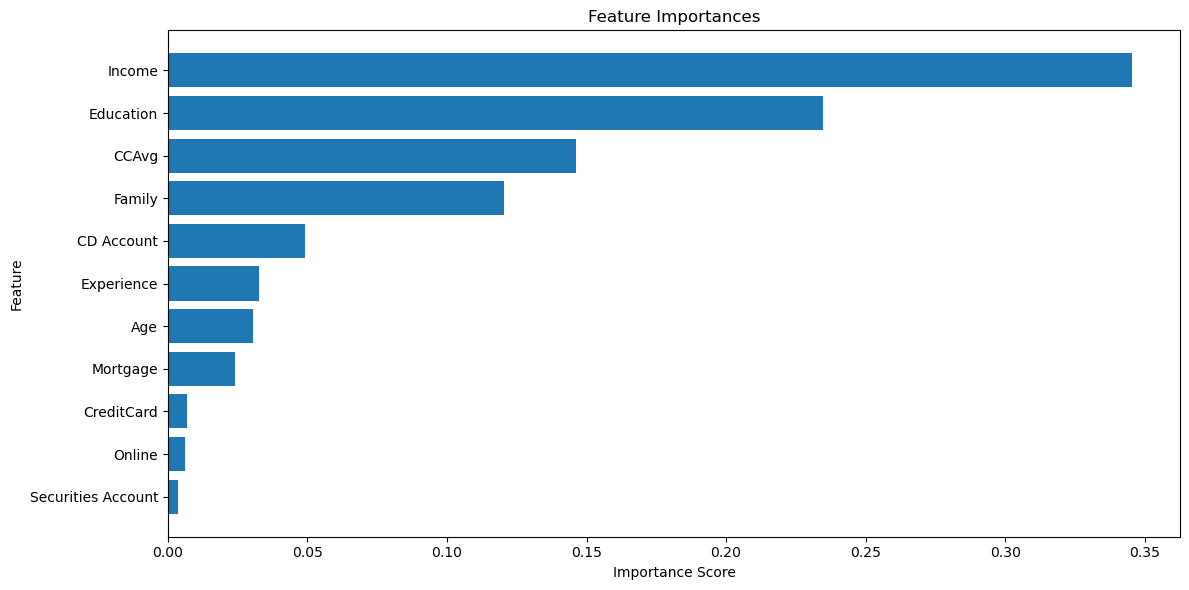

In [92]:
feature_importances = dt_rf.feature_importances_
# This is a numpy array

# Sort feature importances in descending order
sort_index = np.argsort(feature_importances)
# sort_index = sort_index[::-1]
# argsort() returns the index position that the element would have
# if the array were sorted in ascending order.
# We can use it to select feature importance and

# Plot horizontal feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), feature_importances[sort_index], align="center")
plt.yticks(range(X.shape[1]), np.array(X.columns)[sort_index])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()

9.4 Boosting. Try manipulate the three parameters to generate three boosting trees. Compare the results.

In [93]:
dt_gb = GradientBoostingClassifier(n_estimators=100, learning_rate =0.001,
max_depth=3, random_state=0)
# B = 100, lambda = 0.001, d = 3

In [94]:
dt_gb = GradientBoostingClassifier(n_estimators=1000, learning_rate =0.001,
max_depth=3, random_state=0)
# B = 1000, lambda = 0.001, d = 1

In [115]:
dt_gb = GradientBoostingClassifier(n_estimators=1000, learning_rate =0.01,
max_depth=1, random_state=0)
# B = 5000, lambda = 0.001, d = 1 # lambda is the shrinkage parameter.
# Too large B may lead to overfitting

In [117]:
dt_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=1000,
                           random_state=0)

In [118]:
dt_gb_pred = dt_gb.predict(X_test)

In [119]:
accuracy_score(y_test, dt_gb_pred)

0.9666666666666667

In [120]:
confusion_matrix(y_test, dt_gb_pred)

array([[1370,    2],
       [  48,   80]])

Grid search:

In [140]:
import sklearn.model_selection as skm
param_grid={'n_estimators': [100,500,1000],
           'learning_rate':[0.1,0.01,0.001],
           'max_depth':[1,2,3]}
tree_grid=skm.GridSearchCV(dt_gb,param_grid,cv=3,scoring='accuracy')


In [141]:
tree_grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  max_depth=1,
                                                  n_estimators=1000,
                                                  random_state=0),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [142]:
tree_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [144]:
tree_grid.best_score_
tree_grid.cv_results_

{'mean_fit_time': array([0.11429358, 0.52689441, 1.04959607, 0.1820658 , 0.90293471,
        1.8014725 , 0.25476336, 1.27228268, 2.55097667, 0.10569795,
        0.52757637, 1.05439544, 0.18027838, 0.90151691, 1.79599953,
        0.23383625, 1.24583729, 2.51773659, 0.10575469, 0.52258921,
        1.07791265, 0.17988229, 0.89441673, 1.78839668, 0.21765423,
        1.12410092, 2.30218633]),
 'std_fit_time': array([0.01083932, 0.00099779, 0.00191882, 0.00017891, 0.00082816,
        0.00191441, 0.00069927, 0.00313662, 0.00459795, 0.0004121 ,
        0.00104901, 0.00187846, 0.0002481 , 0.00455513, 0.00605358,
        0.00511918, 0.00543601, 0.01046801, 0.00046149, 0.00126568,
        0.05312588, 0.00015296, 0.00139222, 0.00350586, 0.00114632,
        0.01077759, 0.05126033]),
 'mean_score_time': array([0.00190202, 0.00475653, 0.00808501, 0.00219901, 0.00738374,
        0.0137225 , 0.002599  , 0.00981776, 0.01794457, 0.00163245,
        0.00510128, 0.00927091, 0.00205231, 0.00697104, 0.013524

In [151]:
best_tree = tree_grid.best_estimator_

In [152]:
best_tree_pred = best_tree.predict(X_test)

In [153]:
accuracy_score(y_test, best_tree_pred)

0.9873333333333333

In [154]:
confusion_matrix(y_test, best_tree_pred)

array([[1368,    4],
       [  15,  113]])